In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [4]:
# Load and preprocess data for CIFAR-10
def load_and_preprocess_cifar10():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Normalize the data
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # One-hot encode the labels
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, y_train, X_test, y_test


In [5]:
# Define CNN model
def build_cifar10_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
# Visualize some images from CIFAR-10
def visualize_data(X_train, y_train, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_train[i])
        plt.title(f"Label: {class_names[np.argmax(y_train[i])]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
# Plot training history
def plot_training_history(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

In [8]:
# Visualize predictions
def visualize_predictions(model, X_test, y_test, class_names):
    predictions = model.predict(X_test[:10])
    plt.figure(figsize=(15, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i])
        predicted_label = class_names[np.argmax(predictions[i])]
        true_label = class_names[np.argmax(y_test[i])]
        plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
# Main script
x_train, y_train, x_test, y_test = load_and_preprocess_cifar10()
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Visualizing sample training images...


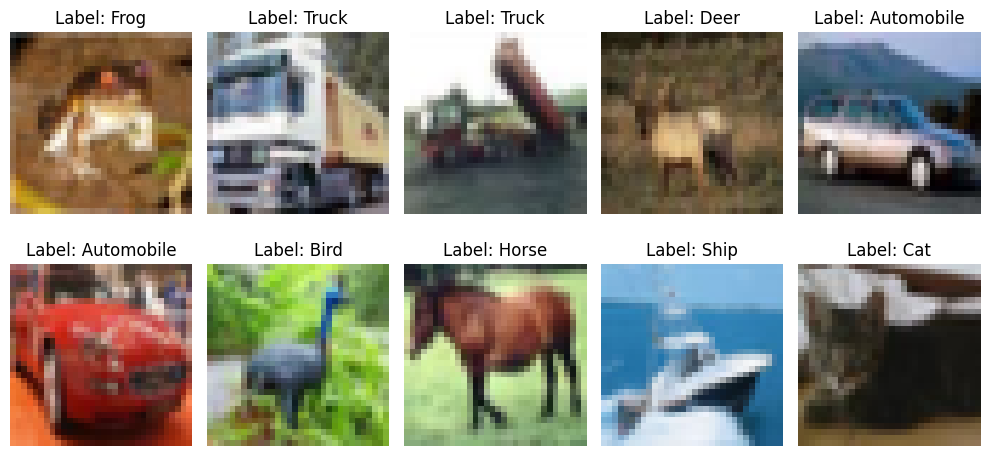

In [10]:
# Visualize training data
print("Visualizing sample training images...")
visualize_data(x_train, y_train, class_names)


In [11]:
# Train the baseline model on CIFAR-10
print("Training on CIFAR-10 dataset")
baseline_model = build_cifar10_model()
baseline_history = baseline_model.fit(
    x_train, y_train,
    epochs=10, validation_split=0.2,
    batch_size=32
)

Training on CIFAR-10 dataset


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - accuracy: 0.3266 - loss: 1.8367 - val_accuracy: 0.5427 - val_loss: 1.2825
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.5229 - loss: 1.3327 - val_accuracy: 0.5873 - val_loss: 1.1761
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.5844 - loss: 1.1830 - val_accuracy: 0.6223 - val_loss: 1.0779
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6114 - loss: 1.0973 - val_accuracy: 0.6494 - val_loss: 1.0097
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 50ms/step - accuracy: 0.6351 - loss: 1.0265 - val_accuracy: 0.6528 - val_loss: 1.0013
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.6654 - loss: 0.9606 - val_accuracy: 0.6751 - val_loss: 0.9319
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.6795 - loss: 0.9043 - val_accuracy: 0.6773 - val_loss: 0.9136
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.6899 

Visualizing training history...


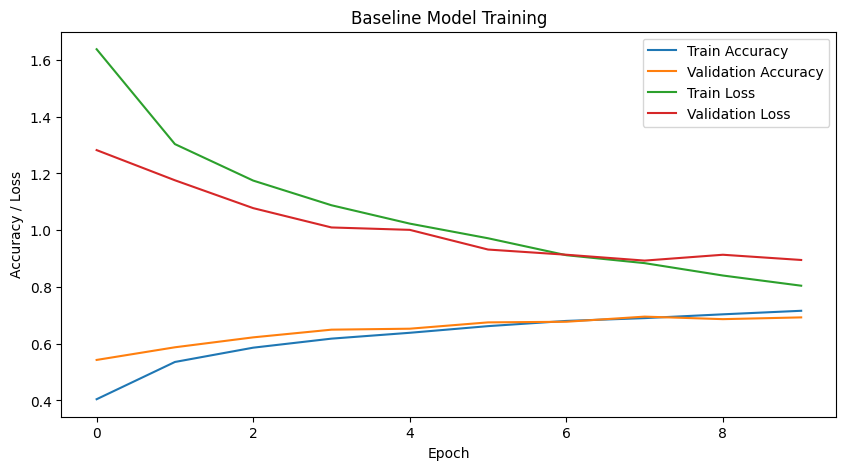

In [12]:
# Plot baseline training history
print("Visualizing training history...")
plot_training_history(baseline_history, "Baseline Model Training")

In [13]:
# Data augmentation for CIFAR-10
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Augment and train on CIFAR-10
augmented_model = build_cifar10_model()
print("Training with data augmentation on CIFAR-10")
augmented_history = augmented_model.fit(
    data_gen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)


Training with data augmentation on CIFAR-10
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.2632 - loss: 1.9750 - val_accuracy: 0.4497 - val_loss: 1.4935
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 71ms/step - accuracy: 0.4025 - loss: 1.6460 - val_accuracy: 0.5328 - val_loss: 1.2897
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4390 - loss: 1.5446 - val_accuracy: 0.5616 - val_loss: 1.2118
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.4652 - loss: 1.4800 - val_accuracy: 0.5458 - val_loss: 1.2727
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.4802 - loss: 1.4513 - val_accuracy: 0.6109 - val_loss: 1.0879
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.4962 - loss: 1.4028 - val_accuracy: 0.5772 - val_loss: 1.1750
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.5040 - loss: 1.3794 - val_accuracy: 0.6067 - val_loss: 1.1139
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 71ms/step - accuracy: 0.5136 - lo

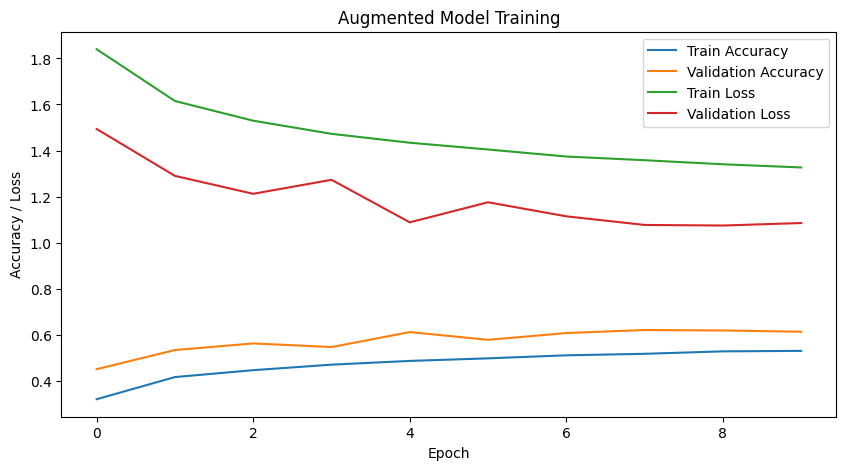

In [14]:
# Plot augmented training history
plot_training_history(augmented_history, "Augmented Model Training")

Visualizing predictions on test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


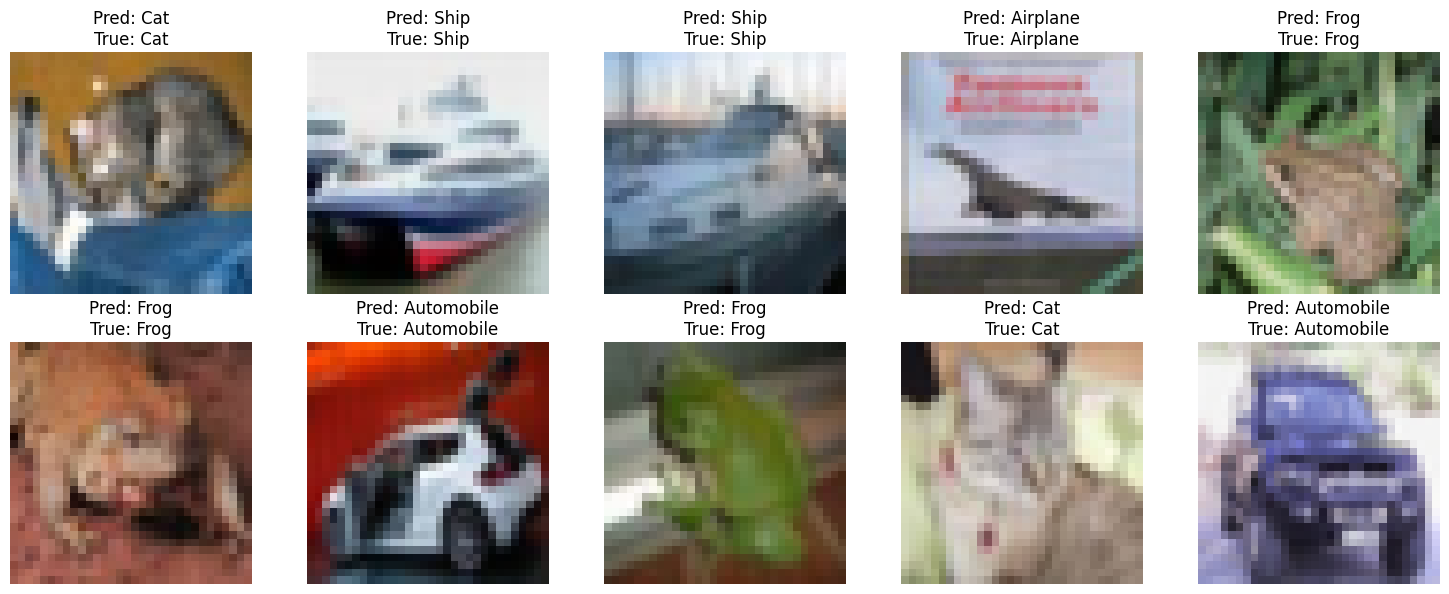

In [15]:
# Evaluate and visualize predictions
print("Visualizing predictions on test images...")
visualize_predictions(baseline_model, x_test, y_test, class_names)

In [16]:
# Classification report and confusion matrix
y_pred = np.argmax(baseline_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print("\nClassification Report for CIFAR-10 (Baseline Model):")
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Classification Report for CIFAR-10 (Baseline Model):
              precision    recall  f1-score   support

    Airplane       0.75      0.73      0.74      1000
  Automobile       0.86      0.77      0.82      1000
        Bird       0.68      0.45      0.54      1000
         Cat       0.44      0.58      0.50      1000
        Deer       0.63      0.64      0.63      1000
         Dog       0.57      0.61      0.59      1000
        Frog       0.80      0.74      0.77      1000
       Horse       0.79      0.70      0.74      1000
        Ship       0.77      0.83      0.80      1000
       Truck       0.73      0.85      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



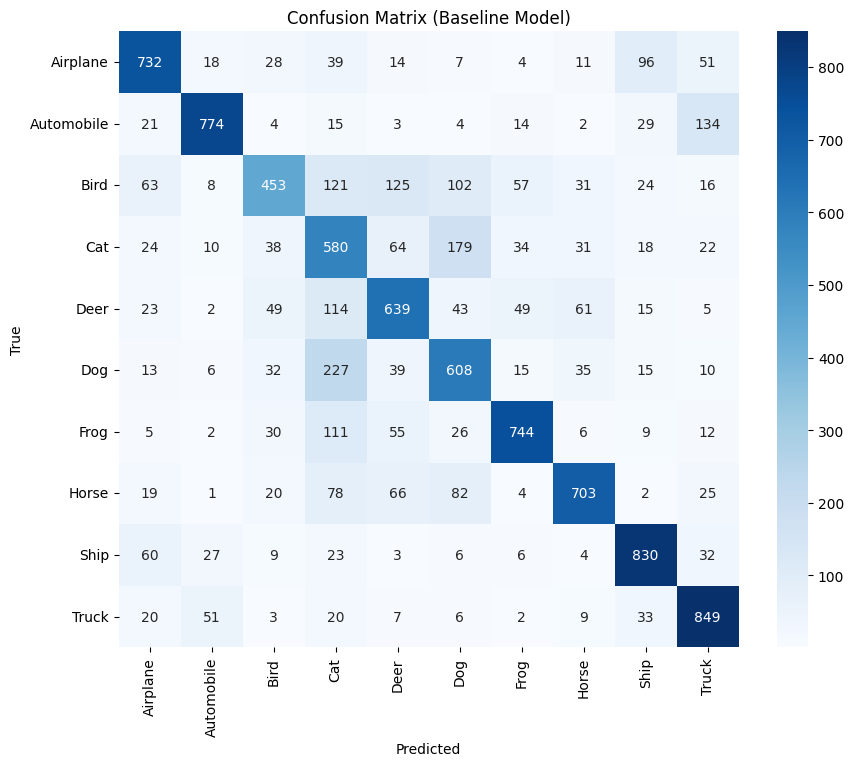

In [17]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Baseline Model)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [18]:
# Evaluate the baseline model
print("Evaluation on CIFAR-10 (Baseline Model)")
baseline_eval = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Accuracy on CIFAR-10: {baseline_eval[1] * 100:.2f}%")

# Evaluate the augmented model
print("Evaluation on CIFAR-10 (Augmented Model)")
augmented_eval = augmented_model.evaluate(x_test, y_test, verbose=0)
print(f"Augmented Accuracy on CIFAR-10: {augmented_eval[1] * 100:.2f}%")

Evaluation on CIFAR-10 (Baseline Model)
Baseline Accuracy on CIFAR-10: 69.12%
Evaluation on CIFAR-10 (Augmented Model)
Augmented Accuracy on CIFAR-10: 61.24%
